In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df= pd.read_excel('October_DATA.xlsx',sheet_name='Classification')# Data used in Classification 

In [3]:
unique_counts = df['T'].value_counts()
unique_counts #number of tests for each class 

Vertical Fractured DP             700
Vertical DP                       634
Vertical Homogeneous              280
Vertical Fractured Homogeneous    140
Name: T, dtype: int64

In [4]:
# Minimum count to balance the dataset
min_count = 140

# Categories in the 'T' column
categories = df['T'].unique()

# Create a balanced DataFrame
balanced_df = pd.DataFrame()

for category in categories:
    category_subset = df[df['T'] == category].sample(min_count)
    balanced_df = balanced_df.append(category_subset)

# Now balanced_df has an equal number of samples for each category

C:\Users\DELL\AppData\Local\Temp\ipykernel_28320\2768882600.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(category_subset)
C:\Users\DELL\AppData\Local\Temp\ipykernel_28320\2768882600.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(category_subset)
C:\Users\DELL\AppData\Local\Temp\ipykernel_28320\2768882600.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(category_subset)
C:\Users\DELL\AppData\Local\Temp\ipykernel_28320\2768882600.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_df = balanced_df.append(category_

In [5]:
balanced_df['T'].value_counts() # New count 

Vertical DP                       140
Vertical Homogeneous              140
Vertical Fractured DP             140
Vertical Fractured Homogeneous    140
Name: T, dtype: int64

In [9]:
# Specify the row number you want to plot
row_number = 30 # change this to your desired row number
# 183 homogenious start
# Assuming you have 13 time columns (Time1, Time2, ..., Time13)
# and corresponding pressure columns (Pressure1, Pressure2, ..., Pressure13)
time_columns = [f't{i}' for i in range(1, 100)]
pressure_columns = [f'dp{i}' for i in range(1, 100)]
pressure_derivative_columns = [f'derp{i}' for i in range(1, 100)]

# Extract data for the specified row
time_data = df.loc[row_number, time_columns]
pressure_data = df.loc[row_number, pressure_columns]
pressure_d_data = df.loc[row_number, pressure_d_columns]

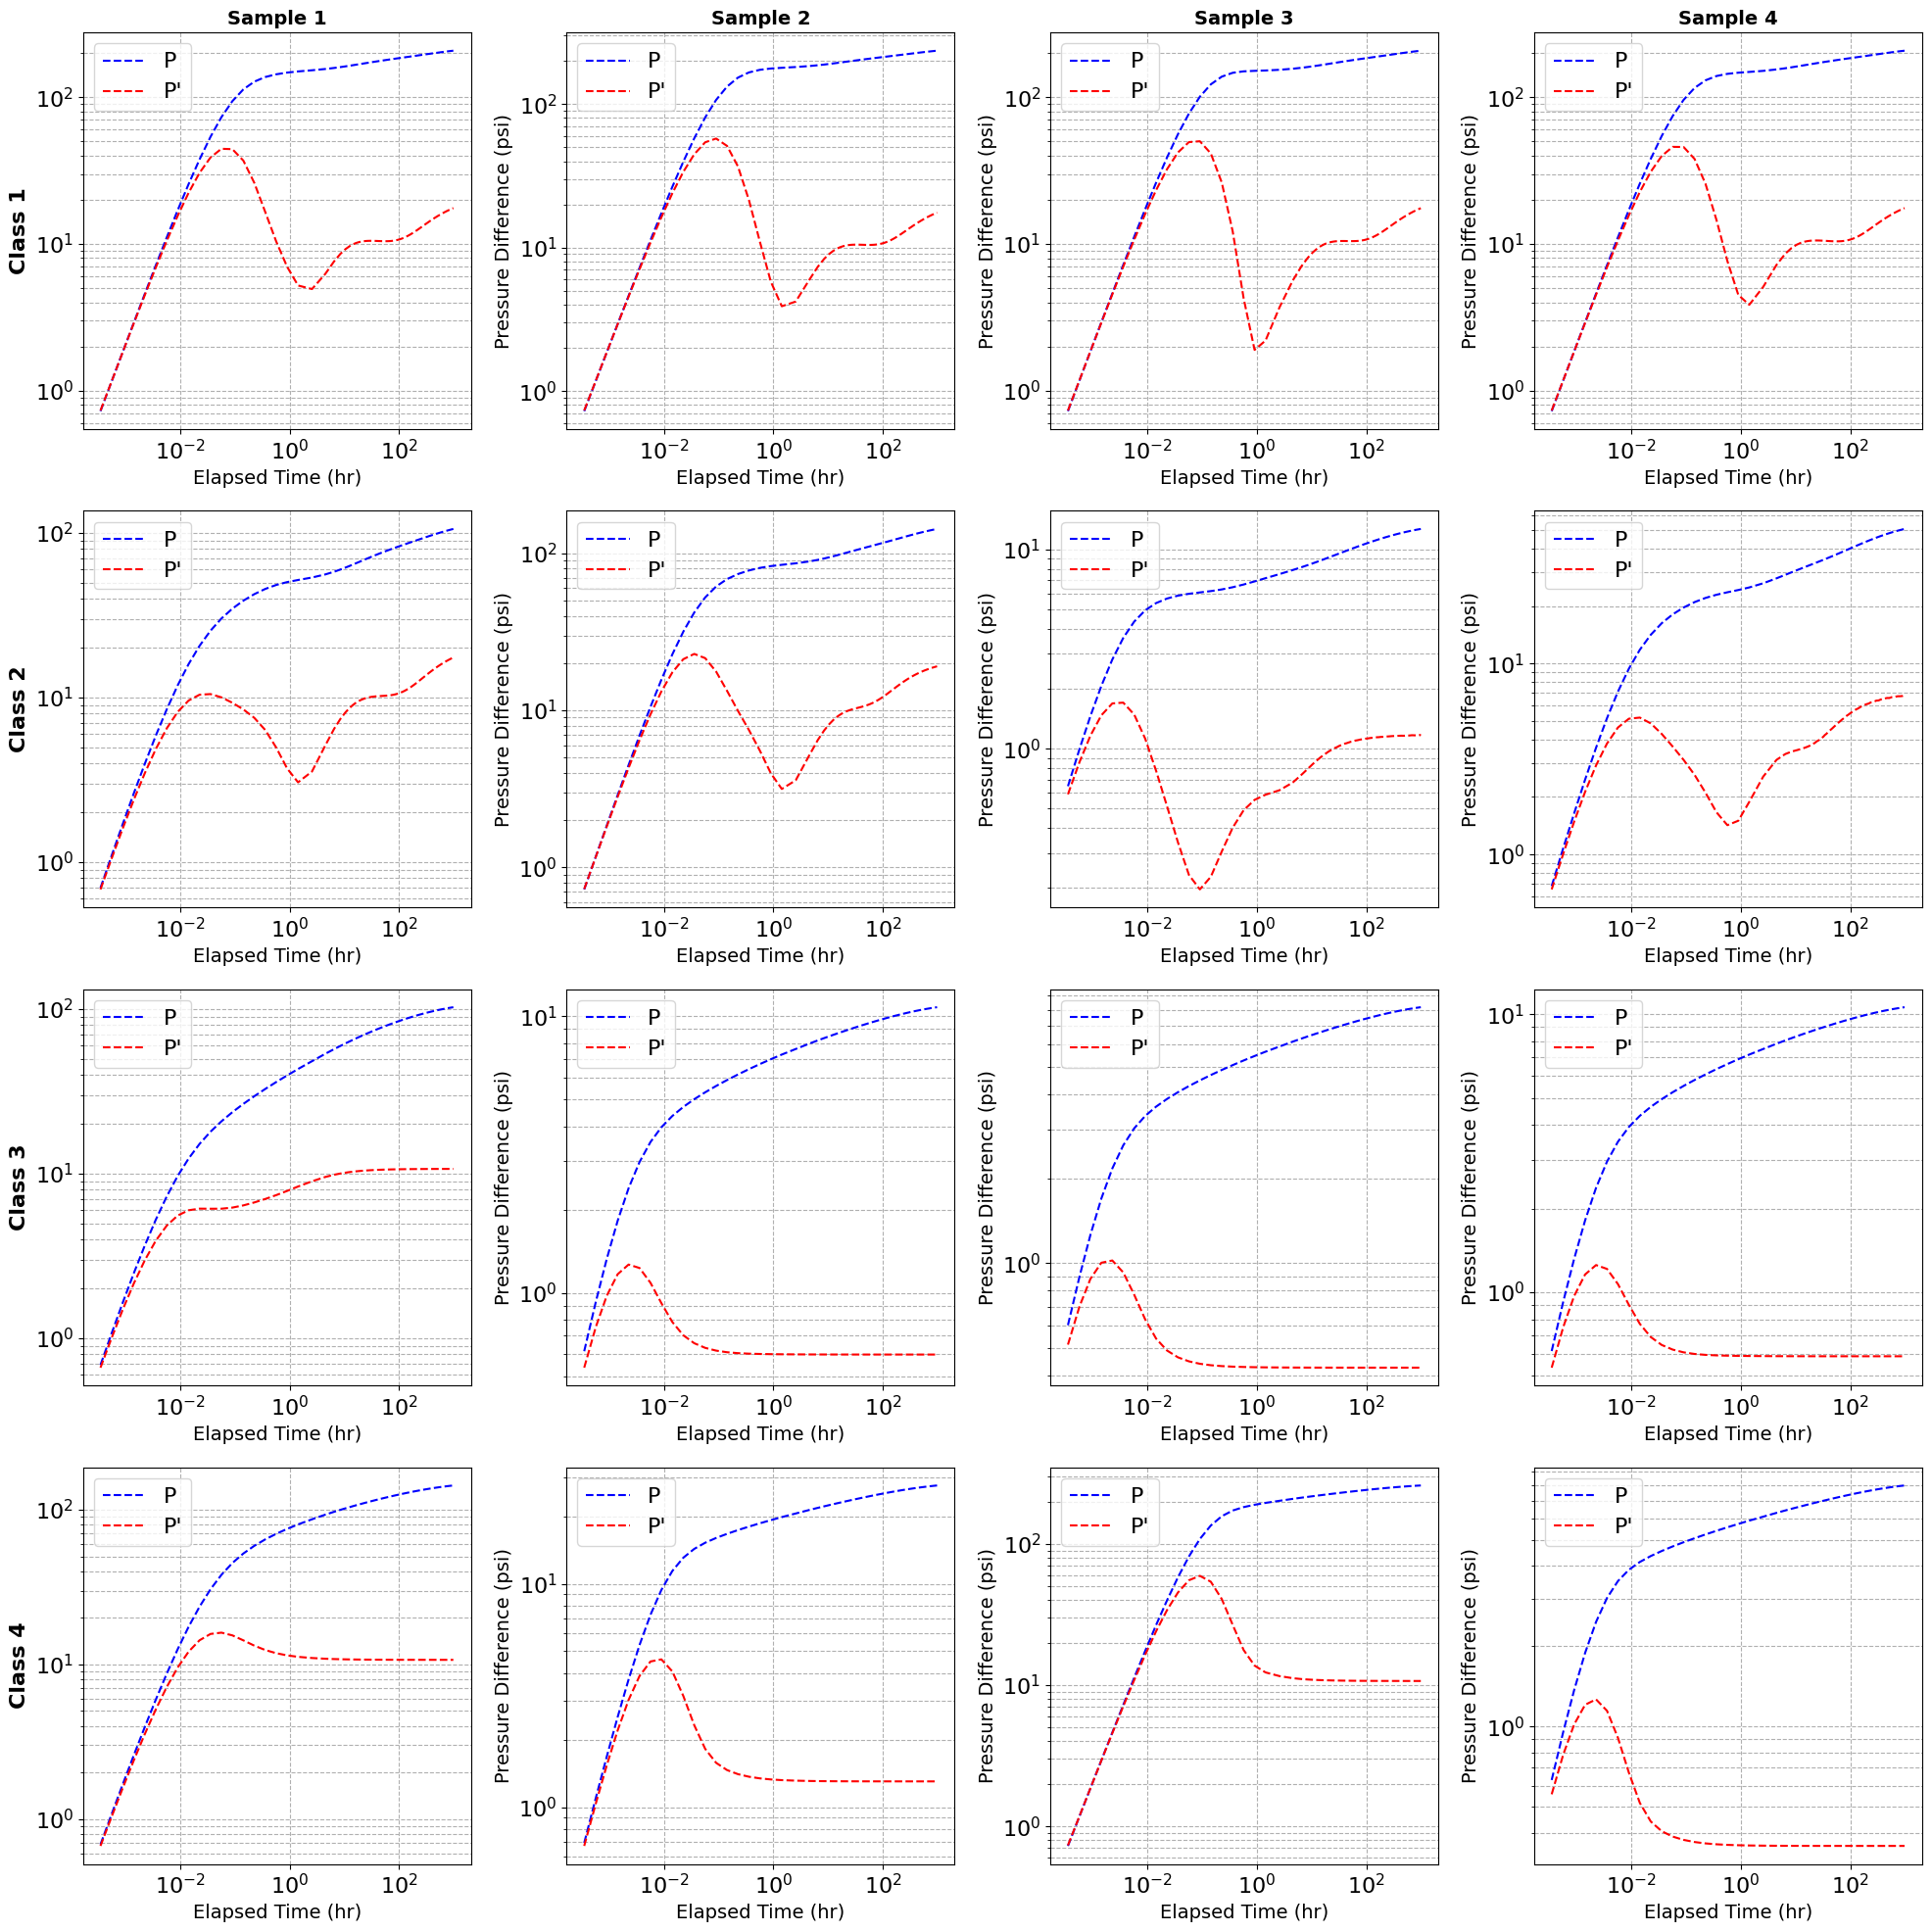

In [11]:
# Assuming 'df' is your DataFrame containing the balanced data good

# Define the number of categories and samples per category
num_categories = df['T'].nunique()
samples_per_category = 4

# Create a figure with a grid of subplots
fig, axs = plt.subplots(num_categories, samples_per_category, figsize=(20, num_categories * 5), squeeze=False)

# Plot settings
colors = {'Pressure': 'blue', 'Derivative': 'red'}
linestyles = {'Pressure': 'b--', 'Derivative': 'r--'}  # Dotted lines
class_labels = [f'Class {i+1}' for i in range(num_categories)]

# Set overall font size for better readability
plt.rcParams.update({'font.size': 16})

# Iterate over each unique category to plot the data
for i, (category_name, category_df) in enumerate(df.groupby('T')):
    # Randomly sample 'samples_per_category' from each category
    samples = category_df.sample(samples_per_category)
    for j, (index, row) in enumerate(samples.iterrows()):
        ax = axs[i, j]

        # Extract time, pressure, and pressure derivative data
        time_data = row[time_columns].dropna().astype(float)
        pressure_data = row[pressure_columns].dropna().astype(float)
        pressure_derivative_data = row[pressure_derivative_columns].dropna().astype(float)

        # Plot pressure and pressure derivative
        ax.loglog(time_data, pressure_data, linestyles['Pressure'], label='P')
        ax.loglog(time_data, pressure_derivative_data, linestyles['Derivative'], label="P'")

        # Add minor ticks
        ax.xaxis.set_minor_locator(ticker.LogLocator(subs='auto'))
        ax.yaxis.set_minor_locator(ticker.LogLocator(subs='auto'))
        ax.grid(True, which="both", ls="--")  # Major and minor grid lines

        # Only set the class label on the leftmost plot and generic labels otherwise
        if j == 0:
            ax.set_ylabel(f"{class_labels[i]}", fontsize=16, fontweight='bold')
        else:
            ax.set_ylabel('Pressure Difference (psi)', fontsize=14)

        # Set title only on the topmost plots
        if i == 0:
            ax.set_title(f'Sample {j+1}', fontsize=14, fontweight='bold')

        # Set a general x-axis label for all plots
        ax.set_xlabel('Elapsed Time (hr)', fontsize=14)

        ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure at a high resolution
#plt.savefig('Well_Test_Curve_Samples_1200_dp.png', dpi=1200)

# Show the plot
plt.show()